# Code from lecture 6

The following notebook contains python examples from lecture 6.

## Pandas Introduction

A series is a one-dimensional array-like object. The easiest way to create a Series is from a list object.

In [1]:
from pandas import Series

prices = Series([30.50, 31.22, 30.65, 29.80, 30.40, 31.60, 32.32, 32.38])
prices

0    30.50
1    31.22
2    30.65
3    29.80
4    30.40
5    31.60
6    32.32
7    32.38
dtype: float64

In [2]:
prices.values

array([30.5 , 31.22, 30.65, 29.8 , 30.4 , 31.6 , 32.32, 32.38])

In [3]:
prices.index

RangeIndex(start=0, stop=8, step=1)

### Creating Series from Python dictionary

You can create a Series object from a dictionary; the index for the series corresponds to the key of the dictionary.

In [4]:
abbrev = {'MI': 'Michigan', 'CA': 'California', 'MN': 'Minnesota', 
          'TX': 'Texas'}

states = Series(abbrev)
states

MI      Michigan
CA    California
MN     Minnesota
TX         Texas
dtype: object

In [5]:
states.size

4

In [6]:
states.shape

(4,)

In [7]:
states.empty

False

### A Stock Time Series Example

In [8]:
timestamp = ['1/3/2017', '1/4/2017', '1/5/2017','1/6/2017','1/9/2017',
             '1/10/2017','1/11/2017','1/12/2017']
prices = [30.50, 31.22, 30.65, 29.80, 30.40, 31.60, 32.32, 32.38]
stockprice = Series(prices, index=timestamp)
stockprice

1/3/2017     30.50
1/4/2017     31.22
1/5/2017     30.65
1/6/2017     29.80
1/9/2017     30.40
1/10/2017    31.60
1/11/2017    32.32
1/12/2017    32.38
dtype: float64

In [9]:
stockprice['1/9/2017']

30.4

In [10]:
stockprice[2:4]

1/5/2017    30.65
1/6/2017    29.80
dtype: float64

In [11]:
stockprice.iloc[2:4]

1/5/2017    30.65
1/6/2017    29.80
dtype: float64

In [12]:
stockprice[stockprice > 32]

1/11/2017    32.32
1/12/2017    32.38
dtype: float64

In [13]:
for price in stockprice:
    print(price)

30.5
31.22
30.65
29.8
30.4
31.6
32.32
32.38


In [14]:
for (sdate, sprice) in stockprice.items():
    print('Price on', sdate, 'is $', sprice)

Price on 1/3/2017 is $ 30.5
Price on 1/4/2017 is $ 31.22
Price on 1/5/2017 is $ 30.65
Price on 1/6/2017 is $ 29.8
Price on 1/9/2017 is $ 30.4
Price on 1/10/2017 is $ 31.6
Price on 1/11/2017 is $ 32.32
Price on 1/12/2017 is $ 32.38


In [15]:
N = stockprice.size
delta = stockprice[1:].values-stockprice[:N-1].values
priceChange = Series(delta,index=stockprice[1:].index)
priceChange

1/4/2017     0.72
1/5/2017    -0.57
1/6/2017    -0.85
1/9/2017     0.60
1/10/2017    1.20
1/11/2017    0.72
1/12/2017    0.06
dtype: float64

In [16]:
priceChange > 0.5

1/4/2017      True
1/5/2017     False
1/6/2017     False
1/9/2017      True
1/10/2017     True
1/11/2017     True
1/12/2017    False
dtype: bool

In [17]:
Series(priceChange > 0.5).value_counts()

True     4
False    3
dtype: int64

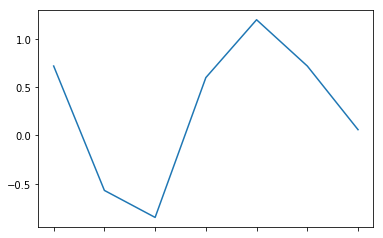

In [18]:
%matplotlib inline
priceChange.plot(kind='line')

In [19]:
priceChange

1/4/2017     0.72
1/5/2017    -0.57
1/6/2017    -0.85
1/9/2017     0.60
1/10/2017    1.20
1/11/2017    0.72
1/12/2017    0.06
dtype: float64

In [20]:
priceChange.max(), priceChange.min(), priceChange.mean(), priceChange.std(), priceChange.median()

(1.2000000000000028,
 -0.8499999999999979,
 0.26857142857142896,
 0.7508756792667379,
 0.5999999999999979)

In [21]:
priceChange.sort_values()

1/6/2017    -0.85
1/5/2017    -0.57
1/12/2017    0.06
1/9/2017     0.60
1/4/2017     0.72
1/11/2017    0.72
1/10/2017    1.20
dtype: float64

# Dealing with missing values

In [22]:
stockprice['1/12/2017'] = None

In [23]:
stockprice.count()

7

In [24]:
stockprice.size

8

In [25]:
stockprice.isnull()

1/3/2017     False
1/4/2017     False
1/5/2017     False
1/6/2017     False
1/9/2017     False
1/10/2017    False
1/11/2017    False
1/12/2017     True
dtype: bool

In [26]:
stockprice.fillna(stockprice.median())

1/3/2017     30.50
1/4/2017     31.22
1/5/2017     30.65
1/6/2017     29.80
1/9/2017     30.40
1/10/2017    31.60
1/11/2017    32.32
1/12/2017    30.65
dtype: float64

In [27]:
stockprice['1/12/2017'] = None
stockprice = stockprice[stockprice.notnull()]
stockprice

1/3/2017     30.50
1/4/2017     31.22
1/5/2017     30.65
1/6/2017     29.80
1/9/2017     30.40
1/10/2017    31.60
1/11/2017    32.32
dtype: float64

In [28]:
stockprice['1/12/2017'] = None
stockprice = stockprice.dropna()
stockprice

1/3/2017      30.5
1/4/2017     31.22
1/5/2017     30.65
1/6/2017      29.8
1/9/2017      30.4
1/10/2017     31.6
1/11/2017    32.32
dtype: object

# Identify outliers

In [29]:
stockprice['1/12/2017'] = 38.12
stockprice

1/3/2017      30.5
1/4/2017     31.22
1/5/2017     30.65
1/6/2017      29.8
1/9/2017      30.4
1/10/2017     31.6
1/11/2017    32.32
1/12/2017    38.12
dtype: object

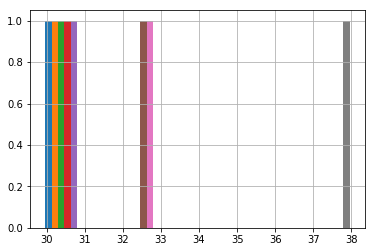

In [30]:
stockprice.hist(bins = 5)

In [31]:
Z_score = (stockprice - stockprice.mean())/stockprice.std()
Z_stockprice = Series(Z_score, index = stockprice.index)
Z_stockprice

1/3/2017     -0.498454
1/4/2017     -0.227851
1/5/2017     -0.442079
1/6/2017     -0.761541
1/9/2017     -0.536038
1/10/2017   -0.0850332
1/11/2017      0.18557
1/12/2017      2.36543
dtype: object

In [32]:
Z_stockprice[Z_stockprice > 2]

1/12/2017    2.36543
dtype: object

# DataFrame 

You can create a DataFrame object from a python dictionary.

In [33]:
from pandas import DataFrame

data = {'Name': ['Bob', 'Mary', 'John','Jill'],
       'Age': [41, 44, 24, 22],
       'Height': [6.5, 5.7, 6.0, 5.9]}
users = DataFrame(data)
users

,Name,Age,Height
0,Bob,41,6.5
1,Mary,44,5.7
2,John,24,6.0
3,Jill,22,5.9


### Selection and Indexing

In [34]:
users.Age

0    41
1    44
2    24
3    22
Name: Age, dtype: int64

In [35]:
users['Age']

0    41
1    44
2    24
3    22
Name: Age, dtype: int64

In [36]:
users[['Name','Age']]

,Name,Age
0,Bob,41
1,Mary,44
2,John,24
3,Jill,22


In [37]:
users.iloc[1]

Name      Mary
Age         44
Height     5.7
Name: 1, dtype: object

In [38]:
users.iloc[1:3]

,Name,Age,Height
1,Mary,44,5.7
2,John,24,6.0


In [39]:
users.at[1,'Age']

44

In [40]:
users.iloc[1,1]

44

In [41]:
users.iloc[1:3,:2]

,Name,Age
1,Mary,44
2,John,24


In [42]:
users.loc[1:2,['Name','Age']]

,Name,Age
1,Mary,44
2,John,24


In [43]:
users.columns

Index(['Name', 'Age', 'Height'], dtype='object')

In [44]:
users.index

RangeIndex(start=0, stop=4, step=1)

In [45]:
users.values

array([['Bob', 41, 6.5],
       ['Mary', 44, 5.7],
       ['John', 24, 6.0],
       ['Jill', 22, 5.9]], dtype=object)

In [46]:
users.size

12

In [47]:
users[users.Age>30]

,Name,Age,Height
0,Bob,41,6.5
1,Mary,44,5.7


In [48]:
users[users.Age > 30]['Name']

0     Bob
1    Mary
Name: Name, dtype: object

### Sizing and Transposing

In [49]:
users.shape

(4, 3)

In [50]:
numRows = users.shape[0]
numRows

4

In [51]:
numCols = users.shape[1]
numCols

3

In [52]:
users.index = [1,2,3,4]
users.transpose()

,1,2,3,4
Name,Bob,Mary,John,Jill
Age,41,44,24,22
Height,6.5,5.7,6,5.9


### Aggregation

In [53]:
users.mean()

Age       32.750
Height     6.025
dtype: float64

In [54]:
users.std()

Age       11.354148
Height     0.340343
dtype: float64

In [55]:
print('Max:')
print(users.max())
print('Min:')
print(users.min())

Max:
Name      Mary
Age         44
Height     6.5
dtype: object
Min:
Name      Bob
Age        22
Height    5.7
dtype: object


### Describe

In [56]:
users.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4.0,32.750,11.354148,22.0,23.50,32.50,41.750,44.0
Height,4.0,6.025,0.340343,5.7,5.85,5.95,6.125,6.5


In [57]:
users.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,4,4,Jill,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,4,NaN,NaN,NaN,32.75,11.3541,22,23.5,32.5,41.75,44
Height,4,NaN,NaN,NaN,6.025,0.340343,5.7,5.85,5.95,6.125,6.5


### Groupby

In [58]:
users2 = users
users2['Gender'] = ['M','F','M','F']
users2

,Name,Age,Height,Gender
1,Bob,41,6.5,M
2,Mary,44,5.7,F
3,John,24,6.0,M
4,Jill,22,5.9,F


In [59]:
users2.groupby('Gender')[['Age','Height']].mean()

,Age,Height
Gender,,
F,33.0,5.80
M,32.5,6.25


### Sorting

In [60]:
users.sort_values('Age')

,Name,Age,Height,Gender
4,Jill,22,5.9,F
3,John,24,6.0,M
1,Bob,41,6.5,M
2,Mary,44,5.7,F


In [61]:
users.sort_values('Height',ascending=False)

,Name,Age,Height,Gender
1,Bob,41,6.5,M
3,John,24,6.0,M
4,Jill,22,5.9,F
2,Mary,44,5.7,F


### Missing Values

In [62]:
from pandas import DataFrame

data = {'Name': ['Bob', 'Mary', 'John','Jill'],
       'Age': [41, 44, 24, 22],
       'Height': [6.5, 5.7, 6.0, 5.9]}
users = DataFrame(data, columns = ['Name','Height','Age','City'])
users.at[2,'City'] = 'Lansing'
users.at[3,'City'] = 'Chicago'
users

,Name,Height,Age,City
0,Bob,6.5,41,NaN
1,Mary,5.7,44,NaN
2,John,6.0,24,Lansing
3,Jill,5.9,22,Chicago


In [63]:
users.count()

Name      4
Height    4
Age       4
City      2
dtype: int64

In [64]:
users.dropna()

,Name,Height,Age,City
2,John,6.0,24,Lansing
3,Jill,5.9,22,Chicago


In [65]:
users.fillna('Unknown')

,Name,Height,Age,City
0,Bob,6.5,41,Unknown
1,Mary,5.7,44,Unknown
2,John,6.0,24,Lansing
3,Jill,5.9,22,Chicago


### Duplicate data

In [66]:
users.loc[4]=Series(users.loc[3])
users

,Name,Height,Age,City
0,Bob,6.5,41,NaN
1,Mary,5.7,44,NaN
2,John,6.0,24,Lansing
3,Jill,5.9,22,Chicago
4,Jill,5.9,22,Chicago


In [67]:
users.duplicated()

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [68]:
users.drop_duplicates()

,Name,Height,Age,City
0,Bob,6.5,41,NaN
1,Mary,5.7,44,NaN
2,John,6.0,24,Lansing
3,Jill,5.9,22,Chicago
